In [1]:
include("plotting_utilities.jl")
include("ode_helper.jl")

Loaded diff equations


solve_ode (generic function with 1 method)

from https://www.math.arizona.edu/~gabitov/teaching/181/math_485/Midterm_Presentations/Sample_Presentation.pdf
![title](img/elastic_pendulum.png)
![title](img/eq_motion_elastic_pendulum.png)


In [306]:
m = 1.
g = 9.81
k = 10

# vector field for the Elastic Pendulum
function vf(θ̇, θ, ṙ, r)
    return [
        -(2 * ṙ * θ̇ + g * sin(θ)) / r # θ_acc
        θ̇ 
        r * θ̇^2 + g * cos(θ) - k/m*r # r_acc
        ṙ
    ]
end

function vf_for_solver(dX, X, params, t)
    dX[1], dX[2], dX[3], dX[4] = vf(X...)
end


θ̇₀, θ₀, ṙ₀, r₀ = [0., π/3, 0., 2.]
X₀ = [θ̇₀, θ₀, ṙ₀, r₀]
@show θ̇₀, θ₀, ṙ₀, r₀
tlength = 100
tspan = (0.0, 2.0)
trange = range(tspan[1], stop=tspan[2], length=tlength)

prob = ODEProblem(vf_for_solver, X₀, tspan)
sol = solve(prob)
sol = hcat(sol.(trange)...)



(θ̇₀, θ₀, ṙ₀, r₀) = (0.0, 1.0471975511965976, 0.0, 2.0)


4×100 Array{Float64,2}:
 0.0     -0.0860215  -0.173287  -0.263078  …  0.117109  0.0307772  -0.0551129
 1.0472   1.04633     1.04371    1.03931      1.04688   1.04837     1.04812  
 0.0     -0.304593   -0.607045  -0.905194     0.414079  0.109534   -0.195778 
 2.0      1.99692     1.98771    1.97242      1.99556   2.00086     1.99998  

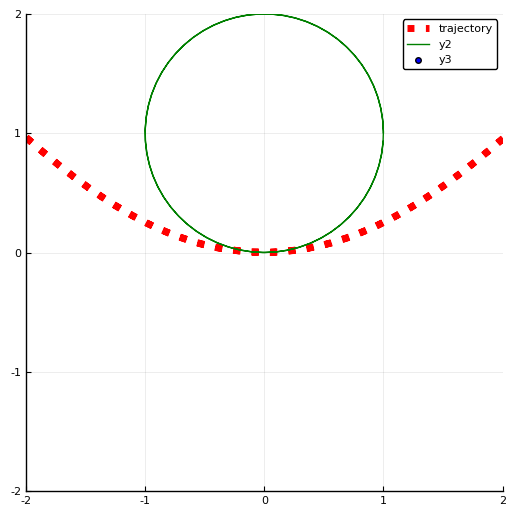

┌ Info: Saved animation to 
│   fn = /Users/maroxe/Dropbox/AAA_Bachir/Learning_with_side_information/Code/tmp.gif
└ @ Plots /Users/maroxe/.julia/packages/Plots/qh1wV/src/animation.jl:90


Plots.AnimatedGif("/Users/maroxe/Dropbox/AAA_Bachir/Learning_with_side_information/Code/tmp.gif")

In [337]:
using Plots; pyplot(size = (500,500))


#xlabel("x")
#ylabel("y")
#gca()[:set_aspect]("equal")
x = (l .+ sol[4, :]) .* sin.(sol[2, :])
y = (l .+ sol[4, :]) .* (1 .- cos.(sol[2, :]))

@inline circle(x, y, r) = Plots.plot!(r.*cos.(-2π:0.1:2π).+x, r.*sin.(-2π:0.1:2π).+y, color=:green)
@inline function background() 
    Plots.plot(x, y, color=:red, ls=:dot, lw=5, label="trajectory")
    circle(0., 1., 1.)
    Plots.xlims!(-2, 2)
    Plots.ylims!(-2, 2)
end


@gif for i=1:tlength
    background()
    Plots.scatter!([x[i]], [y[i]], color=:blue)
    axis("equal")
end every 1
